# Seaborn

Import required libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Generate data to visualize

We generate a CSV data file with various kinds of variables and types.

In [76]:
nr_data = 100
gaussian = np.random.normal(loc=1.5, scale=2.0, size=nr_data)
poisson = np.random.poisson(lam=5.0, size=nr_data)
labels = np.random.choice(['A', 'B', 'C', 'D'], size=nr_data)
x = np.linspace(0.0, 100.0, nr_data)
y = 1.3*x + 2.0 + np.random.normal(scale=8, size=nr_data)
x1 = np.random.choice(np.arange(1, 10, 1), size=nr_data)
y1 = 1.3*x1 + 2.0 + np.random.normal(scale=1.5, size=nr_data)
x2 = np.sort(np.random.gamma(3, scale=4, size=nr_data))
y2 = 1.3*x2 + 2.0 + np.random.normal(scale=1.5, size=nr_data)
binary = np.random.choice(np.array(['yes', 'no']), size=nr_data)
x3 = x2.copy()
y3 = np.where(binary == 'yes', 1.3, 1.9)*x3 + \
     np.where(binary == 'yes', 2.0, -1.0) + \
     np.random.normal(size=nr_data)
with open('Data/data.txt', 'w') as file:
    print('gaussian,poisson,label,x,y,x1,y1,x2,y2,binary,x3,y3',file=file)
    for i in range(nr_data):
        print(f'{gaussian[i]},{poisson[i]},{labels[i]},{x[i]},{y[i]},'
              f'{x1[i]},{y1[i]},{x2[i]},{y2[i]},{binary[i]},{x3[i]},{y3[i]}',
              file=file)

Read the CSV file as a pandas dataframe.

In [77]:
data = pd.read_csv('Data/data.txt', delimiter=',')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
gaussian    100 non-null float64
poisson     100 non-null int64
label       100 non-null object
x           100 non-null float64
y           100 non-null float64
x1          100 non-null int64
y1          100 non-null float64
x2          100 non-null float64
y2          100 non-null float64
binary      100 non-null object
x3          100 non-null float64
y3          100 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 9.5+ KB


Create a simple matplotlib scatter plot for $x$ and $y$.

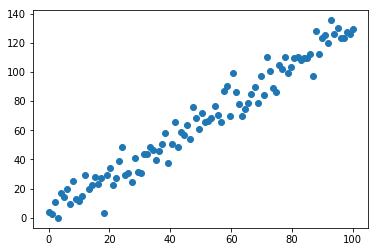

In [84]:
plt.scatter(x='x', y='y', data=data);

Now use Seaborn to plot the same data, but also include the result of a linear regression.

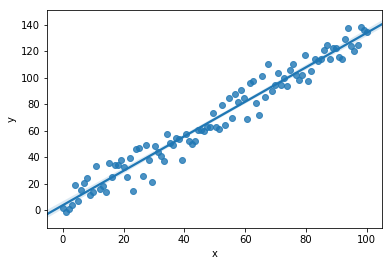

In [61]:
sns.regplot(x='x', y='y', data=data);

If we have data where the $x$-values are integer, and we have multiple $y$-values for each $x$-value, adding some "jitter" to the $x$-values makes the plot more informative.

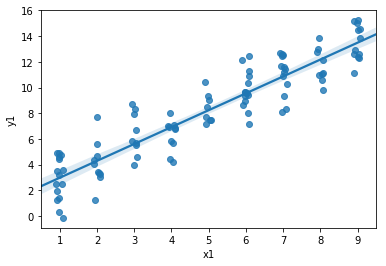

In [62]:
sns.regplot(x='x1', y='y1', data=data, x_jitter=0.1);

In the plot below, the mean value for $x$ is shown, as well as a confidence interval.

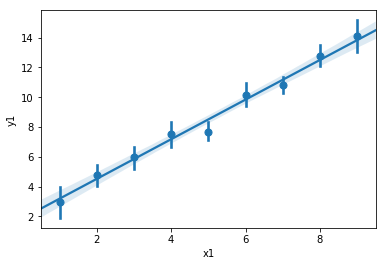

In [85]:
sns.regplot(x='x1', y='y1', data=data, x_estimator=np.mean);

A joint plot shows the distribution of the $x$ and $y$ data, as well as their relationship.

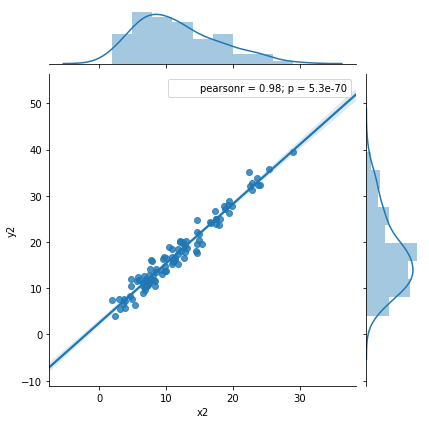

In [64]:
sns.jointplot(x='x2', y='y2', data=data, kind='reg');

Since we have a data set with a categorical attribute, the data set can be split per "label" category, showing a regression plot for each.

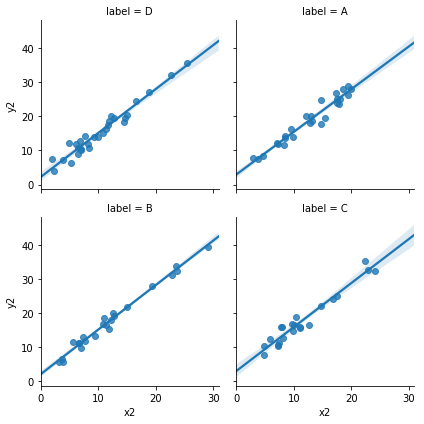

In [67]:
sns.lmplot(x='x2', y='y2', data=data,
           col='label', col_wrap=2, size=3);

For categorical data, it is also possible to plot the two "binary" categories in the same plot.

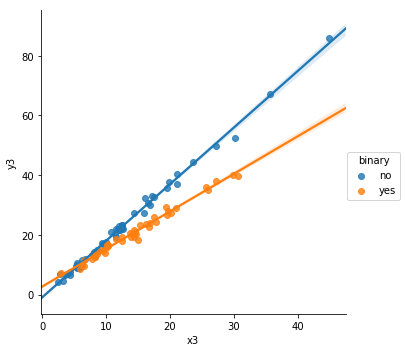

In [79]:
sns.lmplot(x='x3', y='y3', data=data, hue='binary');

In the plots below, we have a plot per category "label", but a hue per "binary" category as well.

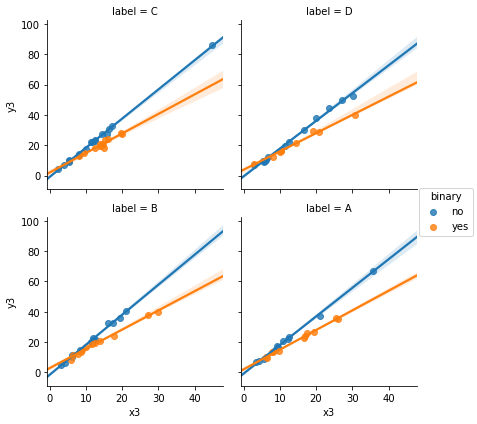

In [82]:
sns.lmplot(x='x3', y='y3', data=data, hue='binary',
           col='label', col_wrap=2, size=3);

The plot below shows the mean values and confidence intervals for the $x$-values split per "binary" category.

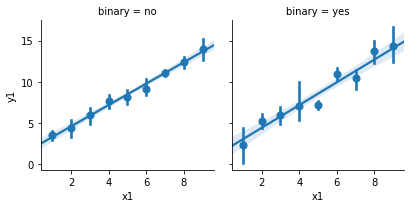

In [88]:
sns.lmplot(x='x1', y='y1', data=data, x_estimator=np.mean,
           col='binary', size=3);